Time Series Analysis of Shampoo sales over a period of three years.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
data=pd.read_csv('shampoodata.csv', parse_dates=[0], index_col=0)
print(data.head())

       Sales of shampoo over a three year period
Month                                           
1-Jan                                      266.0
1-Feb                                      145.9
1-Mar                                      183.1
1-Apr                                      119.3
1-May                                      180.3


<ipython-input-6-2c4849bd072a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data=pd.read_csv('shampoodata.csv', parse_dates=[0], index_col=0)


In [19]:
data = data.rename(columns={'Sales of shampoo over a three year period': 'Sales'})

In [20]:
data_filled=data.fillna(method='ffill')
print(data_filled.head())


       Sales
Month       
1-Jan  266.0
1-Feb  145.9
1-Mar  183.1
1-Apr  119.3
1-May  180.3


<ipython-input-20-0c2edf629fdf>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled=data.fillna(method='ffill')


In [21]:
data_cleaned=data_filled.drop_duplicates()

In [22]:
print(data_cleaned.columns)

Index(['Sales'], dtype='object')


In [23]:
from scipy.stats import zscore
z_scores = zscore(data_cleaned['Sales'])
outliers = abs(z_scores) > 3
data_cleaned.loc[outliers, 'Sales'] = data_cleaned['Sales'].median()

In [24]:
data_cleaned['Normalized_Sales'] = (data_cleaned['Sales'] - data_cleaned['Sales'].min()) / data_cleaned['Sales'].max()-data_cleaned['Sales'].min()


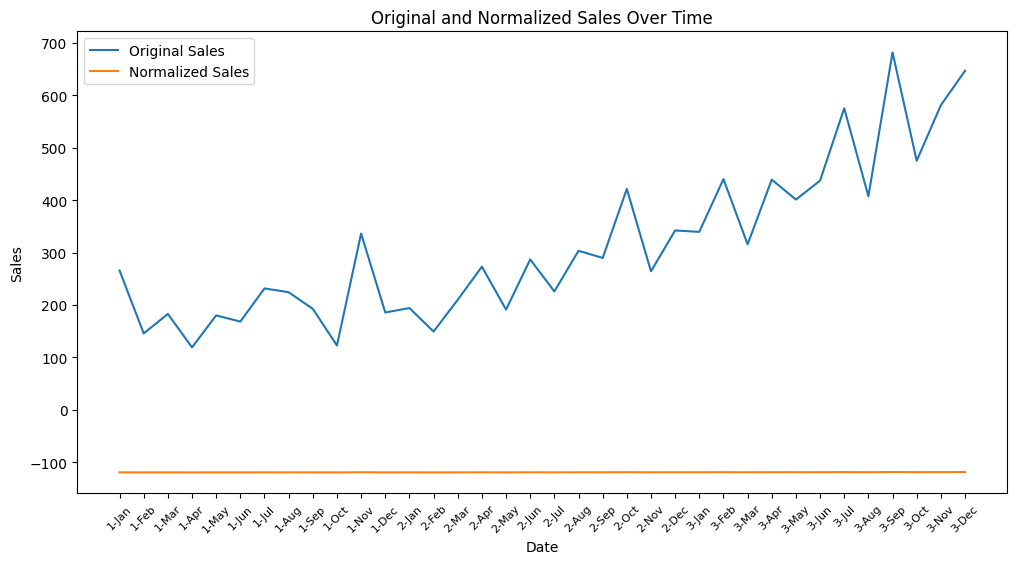

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned.index, data_cleaned['Sales'], label='Original Sales')
plt.plot(data_cleaned.index, data_cleaned['Normalized_Sales'], label='Normalized Sales')
plt.xlabel('Date')
plt.xticks(rotation=45, fontsize=8)
plt.ylabel('Sales')
plt.title('Original and Normalized Sales Over Time')
plt.legend()
plt.show()